# HOUSE PRICING PREDICTION

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [294]:
# importing data file
data=pd.read_csv("House_Pricing_Data_of_North_America.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# Checking & Treating Outliers in Target Variable

In [240]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

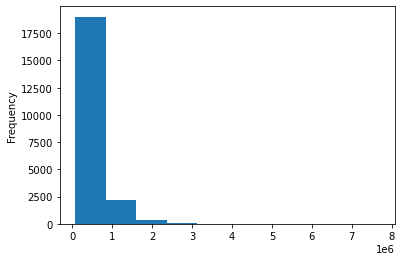

In [241]:
#distribution of target variable
data['Sale Price'].plot.hist()

In [242]:
q1=data['Sale Price'].quantile(.25)
q3=data['Sale Price'].quantile(.75)

iqr=q3-q1

In [243]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [244]:
# imputing outliers
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [245]:
data['Sale Price']=data['Sale Price'].apply(limit_imputer)

In [246]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

# Checking & Treating Missing Values in Target Variable

In [247]:
data['Sale Price'].isnull().sum()

4

In [248]:
data.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [249]:
data['Sale Price'].isnull().sum()

0

(array([ 501., 3379., 4513., 3911., 3069., 1977., 1432.,  877.,  531.,
        1419.]),
 array([  75000. ,  180457.5,  285915. ,  391372.5,  496830. ,  602287.5,
         707745. ,  813202.5,  918660. , 1024117.5, 1129575. ]),
 <BarContainer object of 10 artists>)

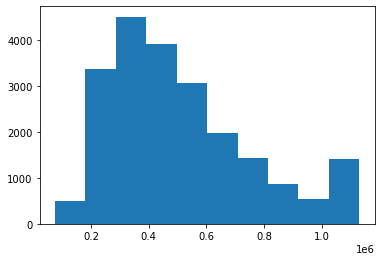

In [250]:
plt.hist(data['Sale Price'],bins=10)

   # Checking & Treating Missing Independent Variables

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [252]:
# isolating numerical variables
numerical_columns=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
                   'Area of the House from Basement (in Sqft)','Latitude',
                   'Longitude','Living Area after Renovation (in Sqft)']

In [253]:
# imputing missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# Zipcode Transform

In [255]:
data['Zipcode'].shape

(21609,)

In [256]:
column=data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [257]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=imputer.fit_transform(column)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# Other Transformations

In [259]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [260]:
# converting from string to categorical
mapping = {'None' : "0",
           'Once' : '1',
           'Twice' : '2',
           'Thrice' : '3',
           'Four' : '4'}

data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [261]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [262]:
# new variable creation
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')

In [263]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [264]:
#manipulating datetime variable
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [265]:
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                                     abs(data['Purchase Year'] - 
                                                        data['Renovated Year']), 0)

In [266]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [267]:
# dropping redundant variables
data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [268]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [269]:
data.drop( columns = 'ID', inplace = True)

In [270]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

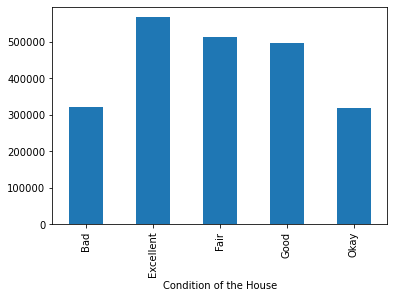

In [271]:
data.groupby('Condition of the House')['Sale Price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Condition of the House'>

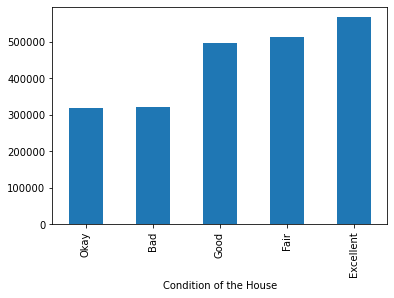

In [272]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Waterfront View'>

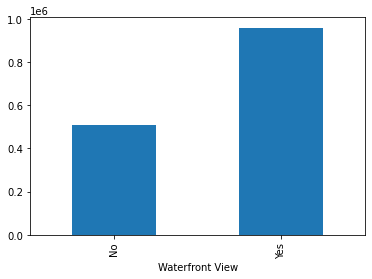

In [273]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Ever Renovated'>

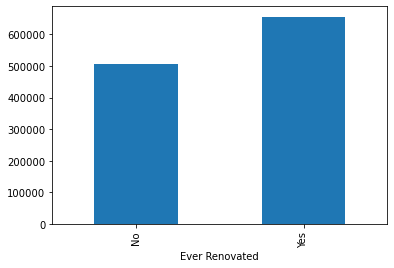

In [274]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Zipcode'>

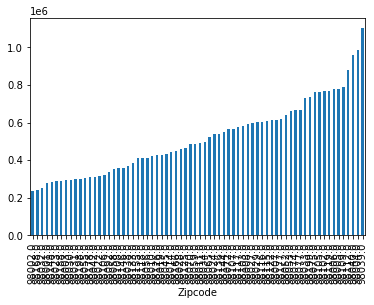

In [275]:
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

In [276]:
data["Waterfront View"] = data["Waterfront View"].map({'No':0,
                                                       'Yes':1})


data['Condition of the House'] = data['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5})

data['Ever Renovated'] = data['Ever Renovated'].map({'No':0,
                                                     'Yes':1})

data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,1,26
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0


# Linear Regression

In [277]:
## Separating Dependent & Independent Variables
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

## -Scaling the Dataset

In [278]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Y=data['Sale Price']
X=scaler.fit_transform(data.drop(columns=['Sale Price']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['Sale Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.087181,-0.30579,-0.629203,-0.563993,-0.734722,-0.658697,0.544734,1.870094,-0.352576,-0.306226,-0.943307,-0.260741,-0.210155,-0.167463
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.087181,-0.30579,-0.629203,-0.563993,0.460990,0.245134,0.680915,0.879534,1.161645,-0.746479,-0.432664,-0.187900,4.758385,4.757239
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.087181,-0.30579,-0.629203,-1.468566,-1.229916,-0.658697,1.293731,-0.933379,1.283619,-0.135806,1.070082,-0.172409,-0.210155,-0.167463
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.087181,-0.30579,2.444136,-0.563993,-0.891735,1.397518,0.204281,1.085122,-0.283288,-1.271941,-0.914127,-0.284546,-0.210155,-0.167463
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.087181,-0.30579,-0.629203,0.340581,-0.130827,-0.658697,-0.544715,-0.073647,0.409587,1.199152,-0.272177,-0.192880,-0.210155,-0.167463


## -Checking & Removing Multicollinearity

In [279]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,-0.006578,0.079575,0.028556,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,0.018573,-0.007198
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.063761,0.187791,-0.124891,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.050282,0.003551
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.103841,0.284678,-0.058922,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.055111,0.023503
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.021605,0.074668,-0.009049,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.007736,0.013835
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.023719,0.029504,-0.263669,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,0.006297,-0.000901
Waterfront View,-0.006578,0.063761,0.103841,0.021605,0.023719,1.000000,0.401856,0.016650,0.070332,0.072099,0.080595,0.026149,0.030286,-0.014275,-0.041927,0.086467,0.030699,0.093291,0.105044
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,0.401856,1.000000,0.045978,0.223661,0.167812,0.276974,0.053395,0.084830,0.006162,-0.078453,0.280452,0.072561,0.104051,0.093546
Condition of the House,0.028556,-0.124891,-0.058922,-0.009049,-0.263669,0.016650,0.045978,1.000000,-0.143747,-0.158167,0.173999,0.361383,0.003076,-0.015008,-0.106556,-0.092884,-0.003426,-0.060152,-0.011216
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.070332,0.223661,-0.143747,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,0.010010,-0.024388
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.072099,0.167812,-0.158167,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.023202,0.010491


In [280]:
## pairs of imdependent variables with correlation greater than 0.5

k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

## -Calculating VIF

In [281]:
# importing variance_inflation_factor function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

# calculatinf VIF for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

No of Bedrooms                                  1.631811
No of Bathrooms                                 3.347113
Flat Area (in Sqft)                          1481.446556
Lot Area (in Sqft)                              2.102807
No of Floors                                    2.026247
Waterfront View                                 1.206062
No of Times Visited                             1.430797
Condition of the House                          1.254902
Overall Grade                                   2.779116
Area of the House from Basement (in Sqft)    1205.274819
Basement Area (in Sqft)                       345.423190
Age of House (in Years)                         2.439610
Zipcode                                         1.661876
Latitude                                        1.176502
Longitude                                       1.810289
Living Area after Renovation (in Sqft)          2.988732
Lot Area after Renovation (in Sqft)             2.135308
Ever Renovated                 

In [282]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0],' has been removed')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print('No Multicollinearity present anymore')
        return data

In [283]:
for i in range(3):
    vif_data=MC_remover(vif_data)

vif_data

Flat Area (in Sqft)  has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.087181,-0.30579,-0.629203,-0.563993,-0.734722,-0.658697,0.544734,1.870094,-0.352576,-0.306226,-0.943307,-0.260741,-0.210155,-0.167463
1,-0.398724,0.175684,-0.189858,0.936817,-0.087181,-0.30579,-0.629203,-0.563993,0.460990,0.245134,0.680915,0.879534,1.161645,-0.746479,-0.432664,-0.187900,4.758385,4.757239
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.087181,-0.30579,-0.629203,-1.468566,-1.229916,-0.658697,1.293731,-0.933379,1.283619,-0.135806,1.070082,-0.172409,-0.210155,-0.167463
3,0.676667,1.149611,-0.243983,-0.915389,-0.087181,-0.30579,2.444136,-0.563993,-0.891735,1.397518,0.204281,1.085122,-0.283288,-1.271941,-0.914127,-0.284546,-0.210155,-0.167463
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.087181,-0.30579,-0.629203,0.340581,-0.130827,-0.658697,-0.544715,-0.073647,0.409587,1.199152,-0.272177,-0.192880,-0.210155,-0.167463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398724,0.500326,-0.337386,2.789023,-0.087181,-0.30579,-0.629203,0.340581,-0.311996,-0.658697,-1.293712,0.468358,1.005026,-0.938201,-0.666101,-0.412394,-0.210155,-0.167463
21605,0.676667,0.500326,-0.224356,0.936817,-0.087181,-0.30579,-0.629203,0.340581,0.630080,-0.658697,-1.463938,1.272020,-0.356184,-1.051815,-0.228408,-0.203977,-0.210155,-0.167463
21606,-1.474115,-1.772168,-0.332099,0.936817,-0.087181,-0.30579,-0.629203,-0.563993,-0.927969,-0.658697,-1.293712,1.234640,0.247916,-0.604462,-1.410179,-0.394156,-0.210155,-0.167463
21607,-0.398724,0.500326,-0.307041,0.936817,-0.087181,-0.30579,-0.629203,0.340581,-0.227451,-0.658697,-1.123485,-0.952068,-0.184409,1.028732,-0.841178,-0.420524,-0.210155,-0.167463


In [284]:
# Calculating VIF for remaining columns

VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(No of Bedrooms                               1.631794
 No of Bathrooms                              3.345908
 Lot Area (in Sqft)                           2.102800
 No of Floors                                 2.026244
 Waterfront View                              1.206057
 No of Times Visited                          1.430797
 Condition of the House                       1.254844
 Overall Grade                                2.778834
 Area of the House from Basement (in Sqft)    4.504000
 Basement Area (in Sqft)                      1.974350
 Age of House (in Years)                      2.439600
 Zipcode                                      1.661816
 Latitude                                     1.176494
 Longitude                                    1.810286
 Living Area after Renovation (in Sqft)       2.988692
 Lot Area after Renovation (in Sqft)          2.135308
 Ever Renovated                               2.934135
 Years Since Renovation                       2.783321
 dtype: fl

## -Train/Test Dataset

In [285]:
X=vif_data
Y=data['Sale Price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15126, 18), (6483, 18), (15126,), (6483,))

## -Linear Regression Using sklearn

In [286]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [287]:
lr.coef_

array([ -9869.60213888,  19355.84398055,  11622.42079893,  15829.50034762,
         8981.91297975,  27921.51438373,  17803.01863386,  88245.98063228,
        70144.09933994,  31634.18923429,  55379.49790778, -16757.99151419,
        78160.17292931, -15193.95213857,  34960.79732428,  -6904.43933815,
        18153.51860199, -13091.39248891])

In [288]:
# Generating predictions over the test set
predictions=lr.predict(x_test)
lr.score(x_test,y_test)

0.7560886134838976

# Making residual plot to verify assumptions 

## 1. Residuals

In [289]:
residuals=predictions-y_test
residual_table=pd.DataFrame({'residuals':residuals,
                             'predictions':predictions})
residual_table=residual_table.sort_values(by='predictions')

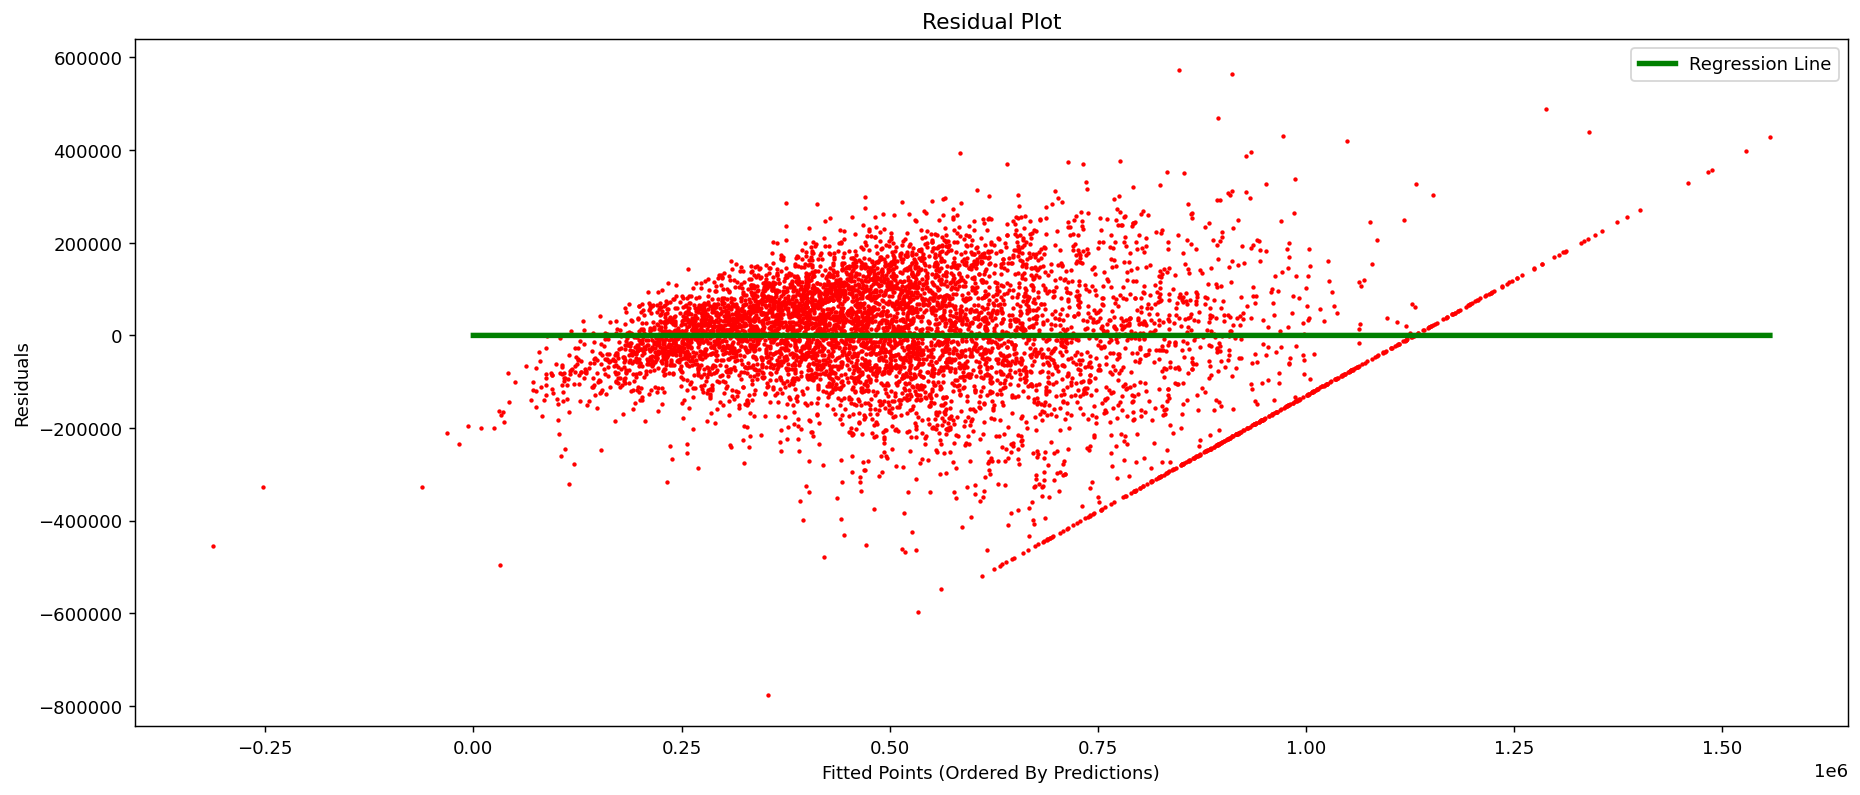

In [290]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

plt.figure(dpi=130, figsize=(17,7))
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,color='green',linewidth=3,label='Regression Line')
plt.y_lim=(-800000,800000)
plt.xlabel('Fitted Points (Ordered By Predictions)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

## 2. Distribution of errors

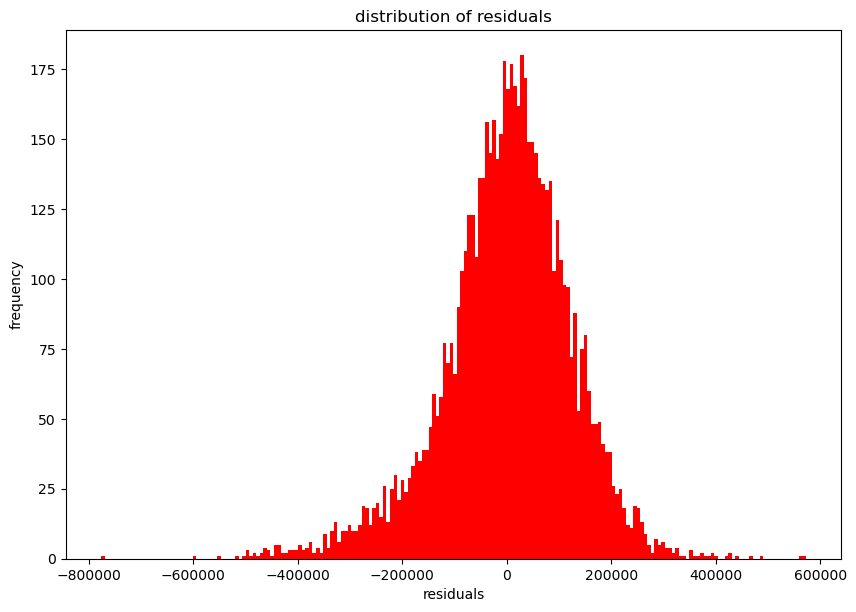

In [291]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# 2. Distribution of errors

In [292]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

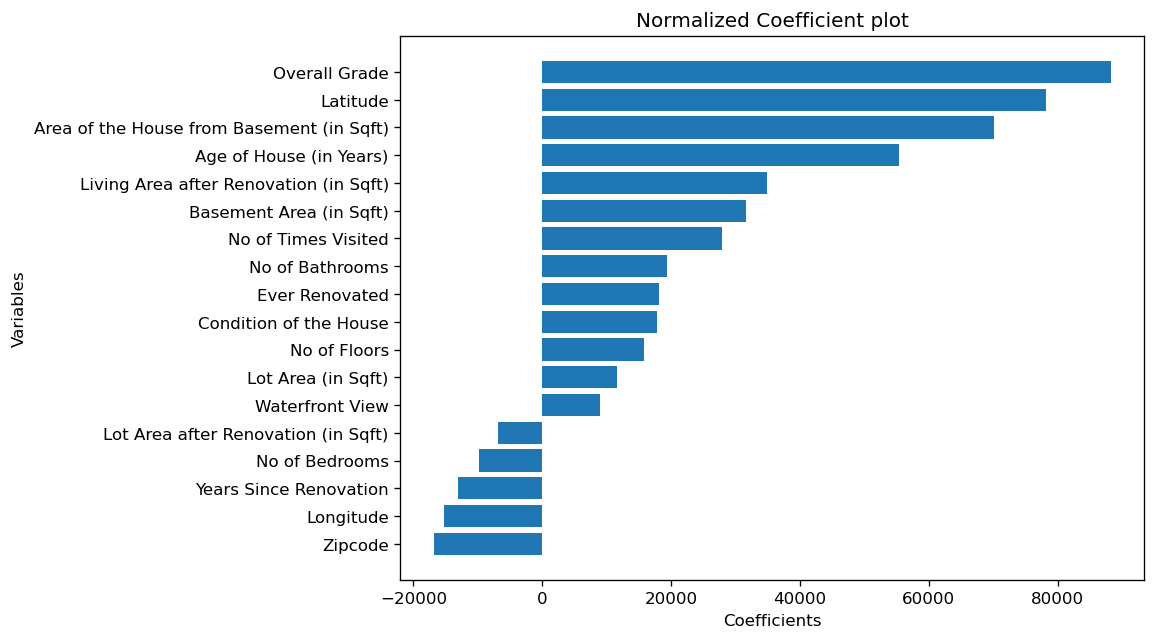

In [293]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()